In [1]:
!git clone https://github.com/divyagarg123/YoloV3_Copy.git

Cloning into 'YoloV3_Copy'...
remote: Enumerating objects: 397, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (367/367), done.
remote: Total 397 (delta 28), reused 384 (delta 19), pack-reused 0
Receiving objects: 100% (397/397), 13.20 MiB | 24.22 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
from google.colab import drive
drive.mount('/content/g1drive')

Mounted at /content/g1drive


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.13.1+cu116 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [4]:
!ffmpeg -i yolo.webm YoloV3_Copy/data/customdata/video_images/image-%03d.png

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [13]:
%cd YoloV3_Copy

/content/YoloV3_Copy


In [15]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(epochs=300, batch_size=10, accumulate=4, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', multi_scale=False, img_size=[512], rect=False, resume=False, nosave=True, notest=False, evolve=False, bucket='', cache_images=True, weights='weights/yolov3-spp-ultralytics.pt', name='', device='', adam=False, single_cls=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

2023-03-24 14:24:58.433405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 14:24:59.783124: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or direc

In [16]:
!python detect.py --conf-thres 0.1 --output data/custom_data/out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/images', output='data/custom_data/out_out', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/100 data/customdata/images/p_1.jpg: 512x512 1 pans, Done. (0.043s)
image 2/100 data/customdata/images/p_10.jpg: 512x512 1 pans, Done. (0.043s)
image 3/100 data/customdata/images/p_11.jpg: 512

In [7]:
!python detect.py --conf-thres 0.1 --output ../g1drive/MyDrive/out_out

Namespace(cfg='cfg/yolov3-custom.cfg', names='data/customdata/custom.names', weights='weights/last.pt', source='data/customdata/video_images', output='../g1drive/MyDrive/out_out', img_size=512, conf_thres=0.1, iou_thres=0.6, fourcc='mp4v', half=False, device='', view_img=False, save_txt=False, classes=None, agnostic_nms=False, augment=False)
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15101MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/552 data/customdata/video_images/image-001.png: 320x512 1 pans, Done. (0.032s)
image 2/552 data/customdata/video_images/image-002.png: 320x512 1 pans, Done. (0.030s)
image 3/552 data/

In [8]:
%cd ..

/content


In [9]:
 !ffmpeg -i g1drive/MyDrive/out_out/image-%03d.png g1drive/MyDrive/video_out.webm

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [6]:
pwd

'/content'

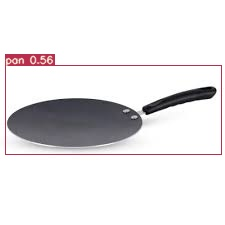

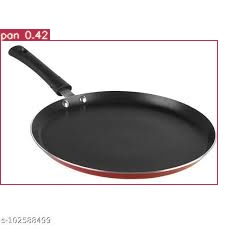

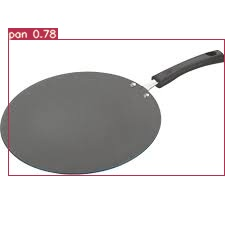

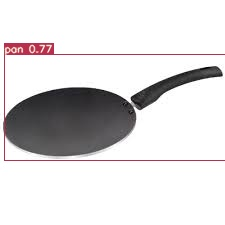

(None, None, None, None)

In [18]:
pan_im1=Image(filename='data/custom_data/out_out/p_1.jpg', width=600)
pan_im2=Image(filename='data/custom_data/out_out/p_2.jpg', width=600)
pan_im3=Image(filename='data/custom_data/out_out/p_3.jpg', width=600)
pan_im4=Image(filename='data/custom_data/out_out/p_4.jpg', width=600)
display(pan_im1),display(pan_im2),display(pan_im3),display(pan_im4)

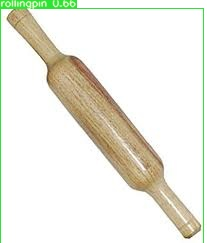

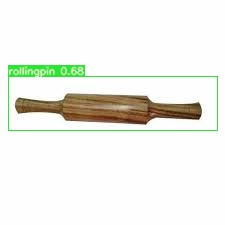

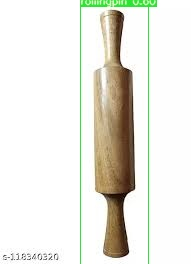

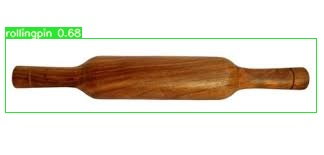

(None, None, None, None)

In [19]:
r_im1=Image(filename='data/custom_data/out_out/r_1.jpg', width=600)
r_im2=Image(filename='data/custom_data/out_out/r_2.jpg', width=600)
r_im3=Image(filename='data/custom_data/out_out/r_3.jpg', width=600)
r_im4=Image(filename='data/custom_data/out_out/r_4.jpg', width=600)
display(r_im1),display(r_im2),display(r_im3),display(r_im4)

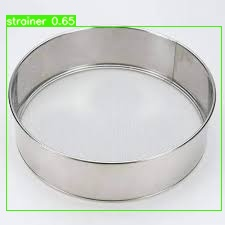

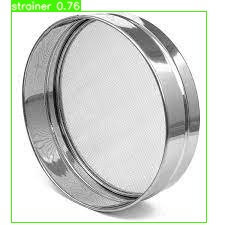

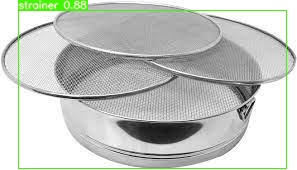

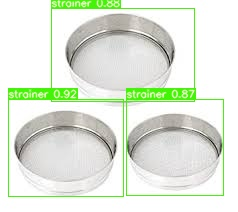

(None, None, None, None)

In [20]:
s_im1=Image(filename='data/custom_data/out_out/s_1.jpg', width=600)
s_im2=Image(filename='data/custom_data/out_out/s_2.jpg', width=600)
s_im3=Image(filename='data/custom_data/out_out/s_3.jpg', width=600)
s_im4=Image(filename='data/custom_data/out_out/s_4.jpg', width=600)
display(s_im1),display(s_im2),display(s_im3),display(s_im4)

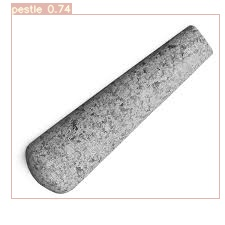

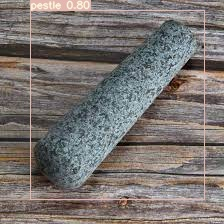

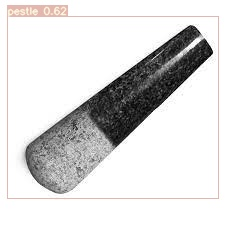

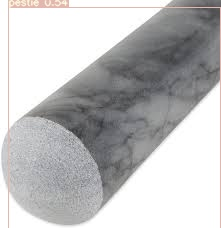

(None, None, None, None)

In [21]:
pe_im1=Image(filename='data/custom_data/out_out/pe_1.jpg', width=600)
pe_im2=Image(filename='data/custom_data/out_out/pe_2.jpg', width=600)
pe_im3=Image(filename='data/custom_data/out_out/pe_3.jpg', width=600)
pe_im4=Image(filename='data/custom_data/out_out/pe_4.jpg', width=600)
display(pe_im1),display(pe_im2),display(pe_im3),display(pe_im4)